# Assignment 3 

In [61]:
# library 
library(dplyr)
library(randomForest)
library(caret)

## Melbourne Vehicle Road Accident Analysis
#### Loading data files

In [2]:
master <- read.csv('accident/ACCIDENT.csv')
location <- read.csv('accident/ACCIDENT_LOCATION.csv')
exact_location <- read.csv('accident/NODE.csv')
weather <- read.csv('accident/ATMOSPHERIC_COND.csv')
road_surface <- read.csv('accident/ROAD_SURFACE_COND.csv')
vehicle_type <- read.csv('accident/VEHICLE.csv')

### Data Description

| Data Name | Description|
|-----------|------------|
|   master  | Contains data and time of accident, accident type and speed zone|
|   location  | Road name of accident |
|   exact_location  | Contains the coordinate of the accident |
|   weather  | Atmospheric condition of the day |
|   road_surface  | Road condition at the time of the accident |
|   vehicle_type  | Vehicle information |

#### View master

In [3]:
head(master)
cat('Attribute Names')
colnames(master)
cat('Listed Speed Zones')
unique(master$SPEED_ZONE)

ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident.Type.Desc,DAY_OF_WEEK,Day.Week.Description,DCA_CODE,DCA.Description,DIRECTORY,⋯,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road.Geometry.Desc,SEVERITY,SPEED_ZONE
T20060000010,13/01/2006,12.42.00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,⋯,6,0,1,0,5,1,1,Cross intersection,3,60
T20060000018,13/01/2006,19.10.00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,⋯,4,0,1,0,3,1,2,T intersection,3,70
T20060000022,14/01/2006,12.10.00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,⋯,2,1,0,0,1,1,5,Not at intersection,2,100
T20060000023,14/01/2006,11.49.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,⋯,2,1,0,0,1,1,2,T intersection,2,80
T20060000026,14/01/2006,10.45.00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,⋯,3,0,3,0,0,1,5,Not at intersection,3,50
T20060000028,14/01/2006,16.15.00,1,Collision with vehicle,6,Saturday,116,LEFT NEAR (INTERSECTIONS ONLY),MEL,⋯,2,1,0,0,1,1,1,Cross intersection,2,100


Attribute Names

[1] "ACCIDENT_NO"          "ACCIDENTDATE"         "ACCIDENTTIME"        
 [4] "ACCIDENT_TYPE"        "Accident.Type.Desc"   "DAY_OF_WEEK"         
 [7] "Day.Week.Description" "DCA_CODE"             "DCA.Description"     
[10] "DIRECTORY"            "EDITION"              "PAGE"                
[13] "GRID_REFERENCE_X"     "GRID_REFERENCE_Y"     "LIGHT_CONDITION"     
[16] "Light.Condition.Desc" "NODE_ID"              "NO_OF_VEHICLES"      
[19] "NO_PERSONS"           "NO_PERSONS_INJ_2"     "NO_PERSONS_INJ_3"    
[22] "NO_PERSONS_KILLED"    "NO_PERSONS_NOT_INJ"   "POLICE_ATTEND"       
[25] "ROAD_GEOMETRY"        "Road.Geometry.Desc"   "SEVERITY"            
[28] "SPEED_ZONE"

Listed Speed Zones

[1]  60  70 100  80  50 110  90  75  40 999 888 777  30

#### Subset of master table

In [4]:
master_keep_var <- c(1, 2, 3, 5, 7, 27, 28)
master_s <- master[,master_keep_var]

In [5]:
head(master)

ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident.Type.Desc,DAY_OF_WEEK,Day.Week.Description,DCA_CODE,DCA.Description,DIRECTORY,⋯,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road.Geometry.Desc,SEVERITY,SPEED_ZONE
T20060000010,13/01/2006,12.42.00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,⋯,6,0,1,0,5,1,1,Cross intersection,3,60
T20060000018,13/01/2006,19.10.00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),MEL,⋯,4,0,1,0,3,1,2,T intersection,3,70
T20060000022,14/01/2006,12.10.00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,MEL,⋯,2,1,0,0,1,1,5,Not at intersection,2,100
T20060000023,14/01/2006,11.49.00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,⋯,2,1,0,0,1,1,2,T intersection,2,80
T20060000026,14/01/2006,10.45.00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,MEL,⋯,3,0,3,0,0,1,5,Not at intersection,3,50
T20060000028,14/01/2006,16.15.00,1,Collision with vehicle,6,Saturday,116,LEFT NEAR (INTERSECTIONS ONLY),MEL,⋯,2,1,0,0,1,1,1,Cross intersection,2,100


#### Description of master accident
The master table contains information on the crash in melbourne. The speedzone of the accident area is recorded, this provides an indication of the speed that the driver was driving at, of course it is reasonable to say that in some cases the driver was travelling faster that the speed zone.

Other datasets related to the accident could be combined to get a better idea of the accident
#### Data Wrangling

In [6]:
location_keep_var <- c(1,4,5,6,7)
location_s <- location[, location_keep_var]

exact_location_keep_var <- c(1, 10, 11, 12)
exact_location_s <- exact_location[, exact_location_keep_var]

weather_s <- weather[,c(1,4)]

road_surface_s <- road_surface[,c(1,3)]

vehicle_type_s <- vehicle_type[,c(1,3)]

In [7]:
melb_cc <- inner_join(master_s, location_s)
melb_cc <- inner_join(melb_cc, exact_location_s)
melb_cc <- inner_join(melb_cc, weather_s)
melb_cc <- inner_join(melb_cc, road_surface_s)
melb_cc <- inner_join(melb_cc, vehicle_type_s)

Joining, by = "ACCIDENT_NO"
Joining, by = "ACCIDENT_NO"
Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”Joining, by = "ACCIDENT_NO"
Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”Joining, by = "ACCIDENT_NO"
Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”Joining, by = "ACCIDENT_NO"
Warning message in inner_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”

#### View new dataset

In [8]:
head(melb_cc)

ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,Accident.Type.Desc,Day.Week.Description,SEVERITY,SPEED_ZONE,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,Lat,Long,Postcode.No,Atmosph.Cond.Desc,Surface.Cond.Desc,VEHICLE_YEAR_MANUF
T20060000010,13/01/2006,12.42.00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,1996
T20060000010,13/01/2006,12.42.00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,2003
T20060000010,13/01/2006,12.42.00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,2001
T20060000018,13/01/2006,19.10.00,Collision with vehicle,Friday,3,70,HALLAM,ROAD,BELGRAVE-HALLAM,ROAD,-37.99092,145.2763,3804,Clear,Dry,1998
T20060000018,13/01/2006,19.10.00,Collision with vehicle,Friday,3,70,HALLAM,ROAD,BELGRAVE-HALLAM,ROAD,-37.99092,145.2763,3804,Clear,Dry,1991
T20060000022,14/01/2006,12.10.00,Fall from or in moving vehicle,Saturday,2,100,BROWNS,ROAD,TRUEMANS,ROAD,-38.39632,144.8549,3939,Clear,Dry,1995


In [9]:
str(melb_cc)

'data.frame':	284756 obs. of  17 variables:
 $ ACCIDENT_NO         : chr  "T20060000010" "T20060000010" "T20060000010" "T20060000018" ...
 $ ACCIDENTDATE        : Factor w/ 4137 levels "1/01/2006","1/01/2007",..: 545 545 545 545 545 681 681 681 681 681 ...
 $ ACCIDENTTIME        : Factor w/ 1439 levels "00.00.00","00.01.00",..: 762 762 762 1150 1150 730 709 709 645 645 ...
 $ Accident.Type.Desc  : Factor w/ 9 levels "Collision with a fixed object",..: 3 3 3 3 3 4 3 3 3 3 ...
 $ Day.Week.Description: Factor w/ 7 levels "Friday","Monday",..: 1 1 1 1 1 3 3 3 3 3 ...
 $ SEVERITY            : int  3 3 3 3 3 2 2 2 3 3 ...
 $ SPEED_ZONE          : int  60 60 60 70 70 100 80 80 50 50 ...
 $ ROAD_NAME           : Factor w/ 12301 levels "","13 MILE","15 MILE",..: 4427 4427 4427 5196 5196 1777 10612 10612 3933 3933 ...
 $ ROAD_TYPE           : Factor w/ 70 levels "","ACCESS","ALLEY",..: 59 59 59 55 55 55 55 55 5 5 ...
 $ ROAD_NAME_INT       : Factor w/ 18331 levels "","1 IN 10","13 MILE",..: 1043

#### Rearranging columns

In [10]:
melb_cc['Date_Time'] <- paste(melb_cc$ACCIDENTDATE, ' ', melb_cc$ACCIDENTTIME)
melb_cc_keep_var <- c(4:(length(colnames(melb_cc)) - 1))
melb_cc <- melb_cc[,c(1, length(colnames(melb_cc)), melb_cc_keep_var)]

#### Reconfiguring data types

In [11]:
melb_cc$Date_Time <- strptime(melb_cc$Date_Time, format = '%d/%m/%Y %H.%M.%S')
melb_cc$Postcode.No <- as.factor(melb_cc$Postcode.No)
melb_cc$VEHICLE_YEAR_MANUF <- as.factor(melb_cc$VEHICLE_YEAR_MANUF)

In [12]:
head(melb_cc, 1)

ACCIDENT_NO,Date_Time,Accident.Type.Desc,Day.Week.Description,SEVERITY,SPEED_ZONE,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,Lat,Long,Postcode.No,Atmosph.Cond.Desc,Surface.Cond.Desc,VEHICLE_YEAR_MANUF
T20060000010,2006-01-13 12:42:00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,1996


#### View of statistical summary

In [13]:
summary(melb_cc)

 ACCIDENT_NO          Date_Time                  
 Length:284756      Min.   :2006-01-01 00:01:00  
 Class :character   1st Qu.:2008-11-22 11:18:45  
 Mode  :character   Median :2011-10-06 17:15:00  
                    Mean   :2011-09-12 09:44:18  
                    3rd Qu.:2014-07-07 16:15:00  
                    Max.   :2017-04-30 13:00:00  
                                                 
                         Accident.Type.Desc Day.Week.Description
 Collision with vehicle           :216701   Friday   :45779     
 Collision with a fixed object    : 28755   Monday   :38334     
 Struck Pedestrian                : 15952   Saturday :38335     
 No collision and no object struck: 10044   Sunday   :32740     
 Vehicle overturned (no collision):  8160   Thursday :44762     
 collision with some other object :  1908   Tuesday  :41790     
 (Other)                          :  3236   Wednesday:43016     
    SEVERITY       SPEED_ZONE         ROAD_NAME        ROAD_TYPE     
 Min.   :1

### Description of car crash data
Other datasets were combined to the master accident table to create a powerful dataset that shows information relating to the crash such as the day of the week, coordinates, road condition, weather and the year of manafacture. The crash data started from 2006 to 2017,  <b>'Collision with vehicle'</b> is the most popular <b>accident type</b>, and most accident occuring in low <b>speed zone</b> of <b>60</b>.

#### Types of accident

index,Var1,Freq
1,Collision with a fixed object,28755
2,collision with some other object,1908
3,Collision with vehicle,216701
4,Fall from or in moving vehicle,1564
5,No collision and no object struck,10044
6,Other accident,109
7,Struck animal,1563
8,Struck Pedestrian,15952
9,Vehicle overturned (no collision),8160


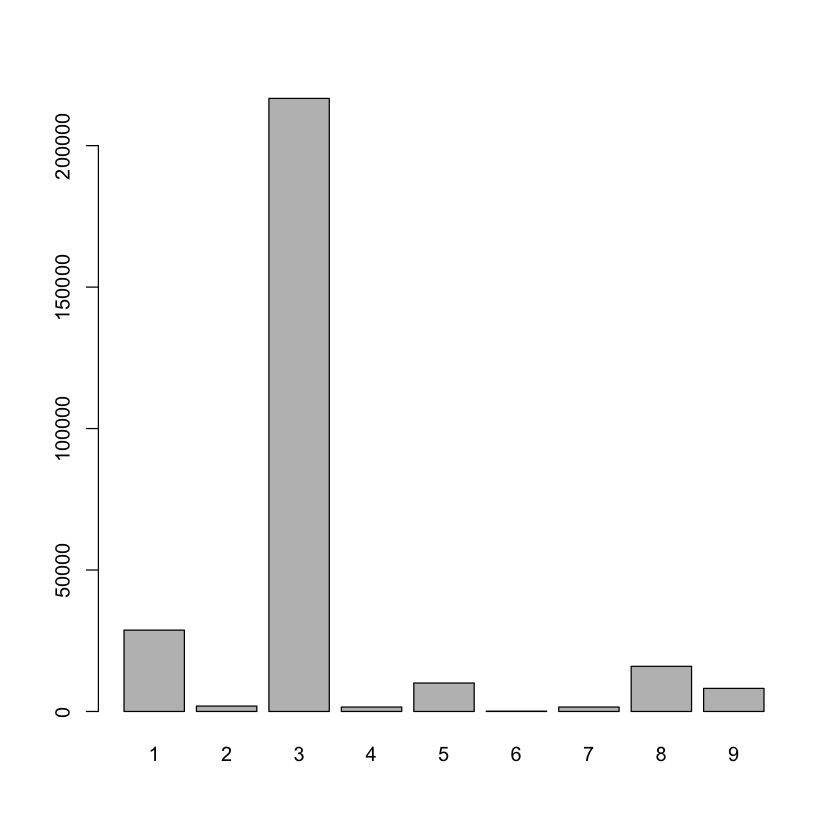

In [14]:
freq_melb_cc <- as.data.frame(table(melb_cc$Accident.Type.Desc))
freq_melb_cc['index'] <- 1:length(unique(melb_cc$Accident.Type.Desc))
freq_melb_cc <- freq_melb_cc[ ,c(3,1,2)]
barplot(table(melb_cc$Accident.Type.Desc), names.arg = c(1:9))
freq_melb_cc

### Accident type and Speed Zone
Accident type is an important factor to determine whether speed is the main cause of accident. The main cause of accident seems to be <i>Collision with vehicle</i>, second is <i>Collision with a fixed object</i>, and disregarding <i>Other accident</i>, the least likely accident was 'Struck animal'

Considering that the main purporse of the research is to determine whether speed has an affect on accident, accidents such as <i>Fall from or in moving vehicle, No collision and no object struck, Other accident and Struck animal</i> are less likely to occur with accident at high speed, as we are more interested on the fact that driver are likely to lose control and crash. Nevertheless, some questions that may raise are stricking an animal and strucking a pedastrian. In most cases, high speed area are usually highways, and pedastrian are not permitted to access, but in the case of animals, this is possible such as on the highway to the outer region of Melbourne, where there are wildlife. 

In this case, cars driving at high speed are likely to hit the animal or pedastrian, rather than those that can stop in time at low speed. It would be a good idea to check how speed limit affects the type of accidents, we will look at this based on speed zone intervals. There are some missing speed zones, default values such as 9999, 888, 777, 30 were used. These will be excluded from the data

#### Speedzone and accident type

In [15]:
melb_cc_exc <- melb_cc[!melb_cc$SPEED_ZONE %in% c(999, 888, 777), ]

index,Var1,Freq
1,Collision with a fixed object,28755
2,collision with some other object,1908
3,Collision with vehicle,216701
4,Fall from or in moving vehicle,1564
5,No collision and no object struck,10044
6,Other accident,109
7,Struck animal,1563
8,Struck Pedestrian,15952
9,Vehicle overturned (no collision),8160


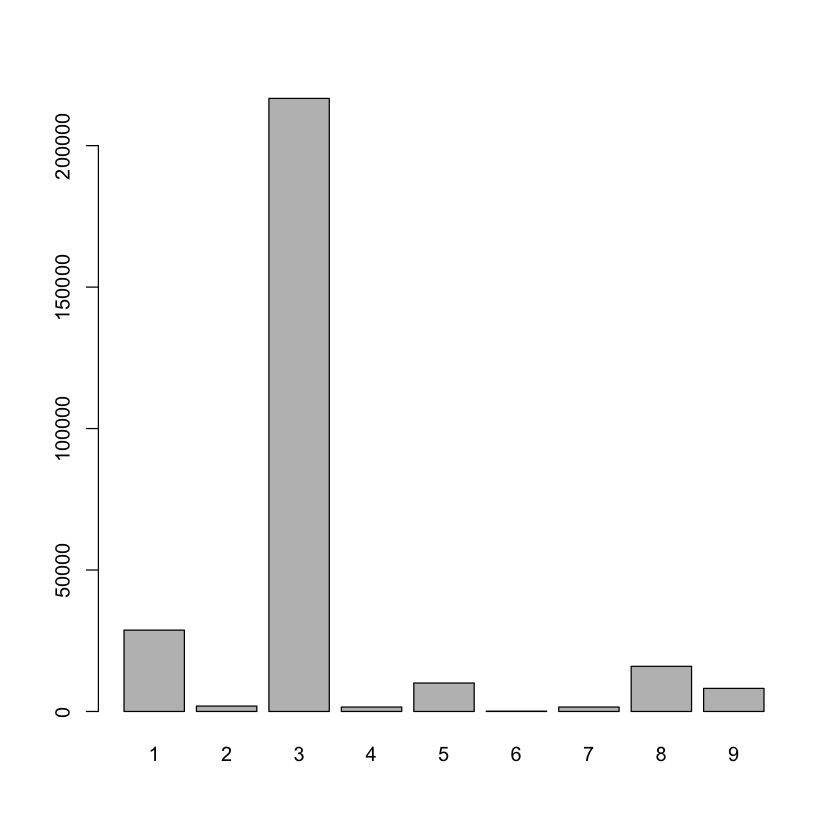

In [16]:
freq_melb_cc <- as.data.frame(table(melb_cc$Accident.Type.Desc))
freq_melb_cc['index'] <- 1:length(unique(melb_cc$Accident.Type.Desc))
freq_melb_cc <- freq_melb_cc[ ,c(3,1,2)]
barplot(table(melb_cc$Accident.Type.Desc), names.arg = c(1:9))
freq_melb_cc

In [17]:
freq_table_acc <- function(data, type = 'freq', title = ''){
    my_freq <- as.data.frame(table(data$Accident.Type.Desc))
    col_len <- c(1:9)
    my_freq['index'] <- col_len
    my_freq['percentage'] <- round((my_freq$Freq/sum(my_freq$Freq) * 100), 2)
    my_freq <- my_freq[ ,c(3,1,2,4)]
    
    if(type == 'bar'){
        bar <- barplot(table(data$Accident.Type.Desc), names.arg = col_len, main = title)
    }
    if(type == 'freq'){ return(my_freq) }
}

In [18]:
melb_cc_less_60 <- melb_cc_exc[melb_cc_exc$SPEED_ZONE <= 60, ]
melb_cc_60_70 <- melb_cc_exc[melb_cc_exc$SPEED_ZONE > 60 & melb_cc_exc$SPEED_ZONE <= 70, ]
melb_cc_g70_80 <- melb_cc_exc[melb_cc_exc$SPEED_ZONE > 70 & melb_cc_exc$SPEED_ZONE <= 80, ]
melb_cc_g80_100 <- melb_cc_exc[melb_cc_exc$SPEED_ZONE > 80 & melb_cc_exc$SPEED_ZONE <= 100, ]
melb_cc_greater_100 <- melb_cc_exc[melb_cc_exc$SPEED_ZONE > 100, ]

#### Less than or equal to 60

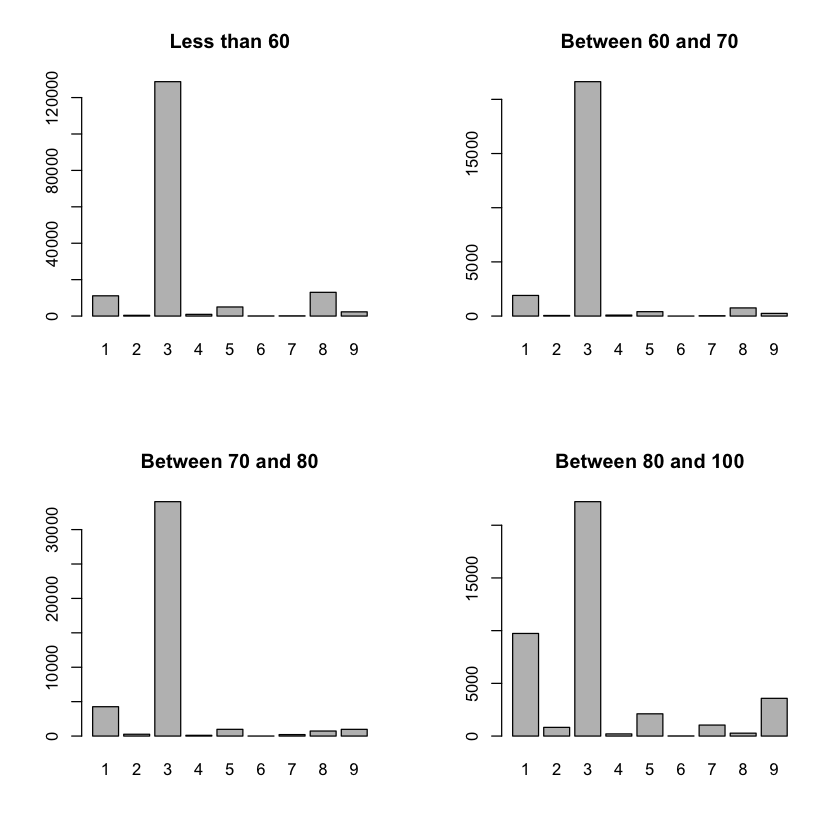

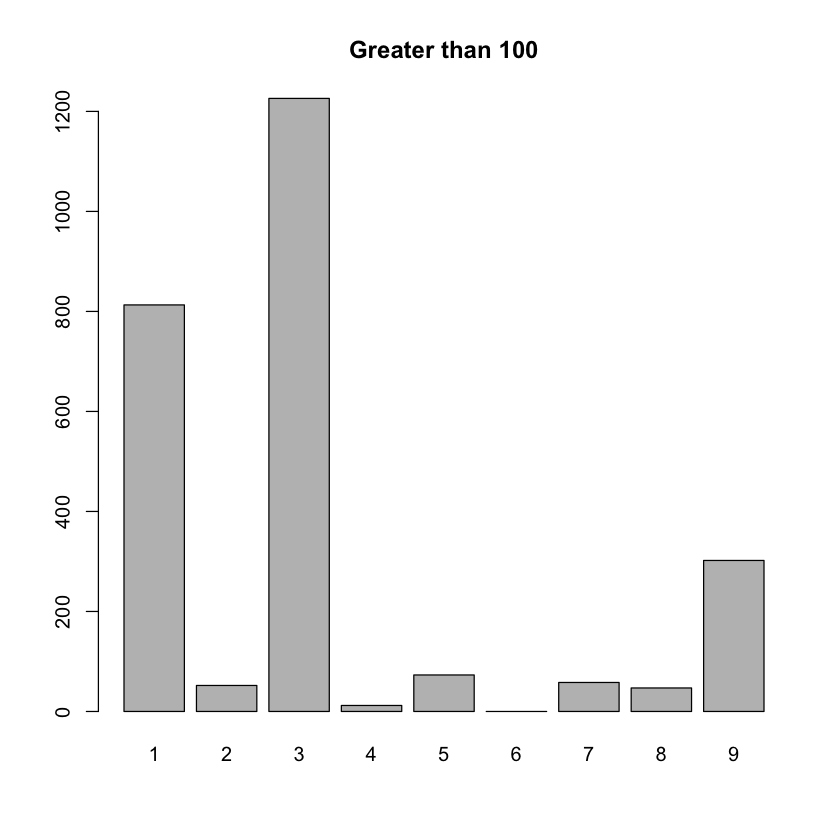

In [19]:
par(mfrow = c(2,2))
freq_table_acc(melb_cc_less_60, 'bar', 'Less than 60')
freq_table_acc(melb_cc_60_70, 'bar', 'Between 60 and 70')
freq_table_acc(melb_cc_g70_80, 'bar', 'Between 70 and 80')
freq_table_acc(melb_cc_g80_100, 'bar', 'Between 80 and 100')
par(mfrow = c(1,1))
freq_table_acc(melb_cc_greater_100, 'bar', 'Greater than 100')

In [20]:
cat('Less than 60')
melb_cc_less_60_f <- freq_table_acc(melb_cc_less_60); melb_cc_less_60_f
cat('Between 60 and 70')
melb_cc_60_70_f <- freq_table_acc(melb_cc_60_70); melb_cc_60_70_f
cat('Between 70 and 80')
melb_cc_g70_80_f <- freq_table_acc(melb_cc_g70_80); melb_cc_g70_80_f
cat('Between 80 and 100')
melb_cc_g80_100_f <- freq_table_acc(melb_cc_g80_100); melb_cc_g80_100_f
cat('Greater than 100')
melb_cc_greater_100_f <- freq_table_acc(melb_cc_greater_100); melb_cc_greater_100_f

Less than 60

index,Var1,Freq,percentage
1,Collision with a fixed object,11124,6.88
2,collision with some other object,415,0.26
3,Collision with vehicle,128736,79.58
4,Fall from or in moving vehicle,945,0.58
5,No collision and no object struck,4995,3.09
6,Other accident,70,0.04
7,Struck animal,125,0.08
8,Struck Pedestrian,13038,8.06
9,Vehicle overturned (no collision),2314,1.43


Between 60 and 70

index,Var1,Freq,percentage
1,Collision with a fixed object,1903,7.58
2,collision with some other object,54,0.22
3,Collision with vehicle,21632,86.13
4,Fall from or in moving vehicle,89,0.35
5,No collision and no object struck,405,1.61
6,Other accident,3,0.01
7,Struck animal,31,0.12
8,Struck Pedestrian,752,2.99
9,Vehicle overturned (no collision),247,0.98


Between 70 and 80

index,Var1,Freq,percentage
1,Collision with a fixed object,4264,10.25
2,collision with some other object,265,0.64
3,Collision with vehicle,34057,81.86
4,Fall from or in moving vehicle,110,0.26
5,No collision and no object struck,979,2.35
6,Other accident,7,0.02
7,Struck animal,216,0.52
8,Struck Pedestrian,731,1.76
9,Vehicle overturned (no collision),977,2.35


Between 80 and 100

index,Var1,Freq,percentage
1,Collision with a fixed object,9734,24.32
2,collision with some other object,825,2.06
3,Collision with vehicle,22235,55.56
4,Fall from or in moving vehicle,204,0.51
5,No collision and no object struck,2110,5.27
6,Other accident,12,0.03
7,Struck animal,1043,2.61
8,Struck Pedestrian,275,0.69
9,Vehicle overturned (no collision),3579,8.94


Greater than 100

index,Var1,Freq,percentage
1,Collision with a fixed object,813,31.48
2,collision with some other object,52,2.01
3,Collision with vehicle,1226,47.46
4,Fall from or in moving vehicle,12,0.46
5,No collision and no object struck,73,2.83
6,Other accident,0,0.00
7,Struck animal,58,2.25
8,Struck Pedestrian,47,1.82
9,Vehicle overturned (no collision),302,11.69


#### Analysis of accident type
As shown, for accidents in speed zone of 60 and less, <i>collision with vehicle</i> seems to be the highest with <i>Struck Pedastrian</i> as second, nevertheless <i>other acciden and Struck animal</i> seems to be the lowest. This seems reasonable that striking pedestrian is high, since this speed zone is usually in built up areas

Speed between 80 and 100 are usually the highways, such as Monash freeway. There are still high number of <i>Collision with vehicle</i> but <i>Struck Pedestrian</i> is a lot lower, since Pedestrian are only permitted to crossing the road at designated areas. <i>Collision with a fixed object</i> is rather high, this could indicate some lost in control

speed greater than 100 shows that the number <i>Collision with a fixed object</i> is near the number of <i>Collision with vehicle</i> this could indicate some lost in control of the car at high speed.

Overall, at low speed zone of less than and equal to 60, there were a total of 79.58% of collision with vehicle. This had decreased significantly to 55.56 and 47.46 respectively for speedzone between 80 and 100, and greater than 100 respectively. However, in speed zone greater than 100, the percentage of collision with a fixed object increases, and there is a difference of almost 10% in Vehicle overturned of speed zone less than and equal to 60. 

It will be useful to see a line graph of the percentage changes between variables that are likely due to be caused from high speed accidents

### Graph

In [21]:
freq_list <- list(melb_cc_less_60_f, melb_cc_60_70_f, melb_cc_g70_80_f, 
                 melb_cc_g80_100_f, melb_cc_greater_100_f)

In [22]:
line_df <- data.frame(collision_type = c(1:9), l60 = melb_cc_less_60_f$percentage, 
                  b60_70 = melb_cc_60_70_f$percentage, b70_80 = melb_cc_g70_80_f$percentage,
                b80_100 = melb_cc_g80_100_f$percentage, g100 = melb_cc_greater_100_f$percentage)

Index and Collision Type

index,Var1
1,Collision with a fixed object
2,collision with some other object
3,Collision with vehicle
4,Fall from or in moving vehicle
5,No collision and no object struck
6,Other accident
7,Struck animal
8,Struck Pedestrian
9,Vehicle overturned (no collision)


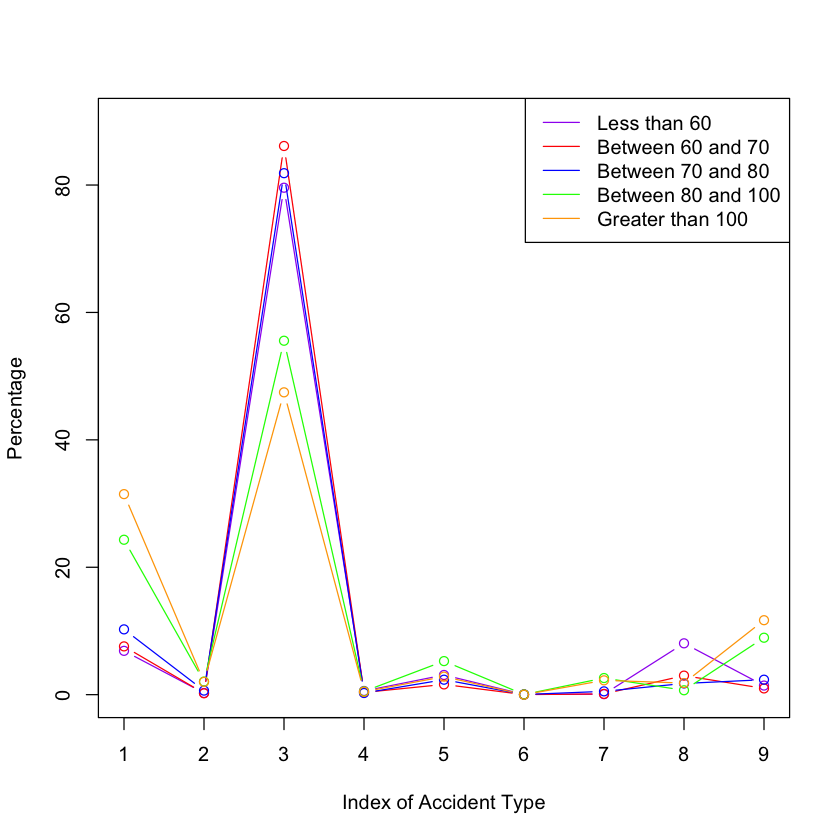

In [23]:
plot(line_df$collision_type, line_df$l60, type = 'b', 
     ylab = 'Percentage',
     xlab = 'Index of Accident Type',
     ylim = c(0, 90),
     xaxt = 'n',
    col = 'purple')
axis(side = 1, at = seq(1, 9, 1))
lines(line_df$collision_type, line_df$b60_70, type = 'b', col = 'red')
lines(line_df$collision_type, line_df$b70_80, type = 'b', col = 'blue')
lines(line_df$collision_type, line_df$b80_100, type = 'b', col = 'green')
lines(line_df$collision_type, line_df$g100, type = 'b', col = 'orange')
legend('topright', legend=c('Less than 60', 'Between 60 and 70', 'Between 70 and 80', 
                            'Between 80 and 100','Greater than 100'),
       col=c("purple", "red", 'blue', 'green', 'orange'), lty = 1)
cat('Index and Collision Type')
melb_cc_60_70_f[, c(1,2)]

#### Anaysis of the line graph
As shown, roughly as the speed zone increase, percentages of speed related accidents such as <i>Collision with a fixed object, Vehicle overturned and Collision with some other object increases</i>

In [24]:
head(melb_cc)

ACCIDENT_NO,Date_Time,Accident.Type.Desc,Day.Week.Description,SEVERITY,SPEED_ZONE,ROAD_NAME,ROAD_TYPE,ROAD_NAME_INT,ROAD_TYPE_INT,Lat,Long,Postcode.No,Atmosph.Cond.Desc,Surface.Cond.Desc,VEHICLE_YEAR_MANUF
T20060000010,2006-01-13 12:42:00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,1996
T20060000010,2006-01-13 12:42:00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,2003
T20060000010,2006-01-13 12:42:00,Collision with vehicle,Friday,3,60,FOSTER,STREET,MCCRAE,STREET,-37.98862,145.2181,3175,Clear,Dry,2001
T20060000018,2006-01-13 19:10:00,Collision with vehicle,Friday,3,70,HALLAM,ROAD,BELGRAVE-HALLAM,ROAD,-37.99092,145.2763,3804,Clear,Dry,1998
T20060000018,2006-01-13 19:10:00,Collision with vehicle,Friday,3,70,HALLAM,ROAD,BELGRAVE-HALLAM,ROAD,-37.99092,145.2763,3804,Clear,Dry,1991
T20060000022,2006-01-14 12:10:00,Fall from or in moving vehicle,Saturday,2,100,BROWNS,ROAD,TRUEMANS,ROAD,-38.39632,144.8549,3939,Clear,Dry,1995


## Model Importance

In [42]:
set.seed(1234)
melb_cc_rf <- melb_cc[which(melb_cc$SPEED_ZONE >= 70 & !melb_cc$SPEED_ZONE %in% c(777, 888, 999)), ]
melb_cc_rf$SPEED_ZONE <- as.factor(melb_cc_rf$SPEED_ZONE)
colnames(melb_cc_rf)[3] <- 'Result'
melb_cc_rf$Result <- factor(melb_cc_rf$Result)
rf_data <- melb_cc_rf[,-c(1, 4, 2, 7, 8, 9, 10, 11, 12, 13, 16)]
rf_data <- na.omit(rf_data)

#### Subsets of data for the forest

In [49]:
rf_data1 <- rf_data[1:10000,]
rf_data2 <- rf_data[10000:20000,]
rf_data3 <- rf_data[20001:30000,]
rf_data4 <- rf_data[30001:40000,]
rf_data5 <- rf_data[40001:50000,]
rf_data6 <- rf_data[50001:60000,]
rf_data7 <- rf_data[60001:70000,]
rf_data8 <- rf_data[70001:80000,]
rf_data9 <- rf_data[80001:90000,]
rf_data10 <- rf_data[90001:100000,]
rf_data11 <- rf_data[100001:109322,]

####  Random Forests

In [52]:
rf1 <- randomForest(Result ~., data = rf_data1, mtry = sqrt(length(rf_data1)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf2 <- randomForest(Result ~., data = rf_data2, mtry = sqrt(length(rf_data2)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf3 <- randomForest(Result ~., data = rf_data3, mtry = sqrt(length(rf_data3)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf4 <- randomForest(Result ~., data = rf_data4, mtry = sqrt(length(rf_data4)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf5 <- randomForest(Result ~., data = rf_data5, mtry = sqrt(length(rf_data5)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
#rf6 <- randomForest(Result ~., data = rf_data6, mtry = sqrt(length(rf_data6)), 
#                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
#rf7 <- randomForest(Result ~., data = rf_data7, mtry = sqrt(length(rf_data7)),
#                   ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf8 <- randomForest(Result ~., data = rf_data8, mtry = sqrt(length(rf_data8)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf9 <- randomForest(Result ~., data = rf_data9, mtry = sqrt(length(rf_data9)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf10 <- randomForest(Result ~., data = rf_data10, mtry = sqrt(length(rf_data10)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)
rf11 <- randomForest(Result ~., data = rf_data11, mtry = sqrt(length(rf_data11)), 
                    ntree = 10, proximity = TRUE, norm.votes = FALSE)

#### Custom combined function

In [53]:
my_combine <- function (...) 
{
  pad0 <- function(x, len) c(x, rep(0, len - length(x)))
  padm0 <- function(x, len) rbind(x, matrix(0, nrow = len - 
                                              nrow(x), ncol = ncol(x)))
  rflist <- list(...)
  areForest <- sapply(rflist, function(x) inherits(x, "randomForest"))
  if (any(!areForest)) 
    stop("Argument must be a list of randomForest objects")
  rf <- rflist[[1]]
  classRF <- rf$type == "classification"
  trees <- sapply(rflist, function(x) x$ntree)
  ntree <- sum(trees)
  rf$ntree <- ntree
  nforest <- length(rflist)
  haveTest <- !any(sapply(rflist, function(x) is.null(x$test)))
  vlist <- lapply(rflist, function(x) rownames(importance(x)))
  numvars <- sapply(vlist, length)
  if (!all(numvars[1] == numvars[-1])) 
    stop("Unequal number of predictor variables in the randomForest objects.")
  for (i in seq_along(vlist)) {
    if (!all(vlist[[i]] == vlist[[1]])) 
      stop("Predictor variables are different in the randomForest objects.")
  }
  haveForest <- sapply(rflist, function(x) !is.null(x$forest))
  if (all(haveForest)) {
    nrnodes <- max(sapply(rflist, function(x) x$forest$nrnodes))
    rf$forest$nrnodes <- nrnodes
    rf$forest$ndbigtree <- unlist(sapply(rflist, function(x) x$forest$ndbigtree))
    rf$forest$nodestatus <- do.call("cbind", lapply(rflist, 
                                                    function(x) padm0(x$forest$nodestatus, nrnodes)))
    rf$forest$bestvar <- do.call("cbind", lapply(rflist, 
                                                 function(x) padm0(x$forest$bestvar, nrnodes)))
    rf$forest$xbestsplit <- do.call("cbind", lapply(rflist, 
                                                    function(x) padm0(x$forest$xbestsplit, nrnodes)))
    rf$forest$nodepred <- do.call("cbind", lapply(rflist, 
                                                  function(x) padm0(x$forest$nodepred, nrnodes)))
    tree.dim <- dim(rf$forest$treemap)
    if (classRF) {
      rf$forest$treemap <- array(unlist(lapply(rflist, 
                                               function(x) apply(x$forest$treemap, 2:3, pad0, 
                                                                 nrnodes))), c(nrnodes, 2, ntree))
    }
    else {
      rf$forest$leftDaughter <- do.call("cbind", lapply(rflist, 
                                                        function(x) padm0(x$forest$leftDaughter, nrnodes)))
      rf$forest$rightDaughter <- do.call("cbind", lapply(rflist, 
                                                         function(x) padm0(x$forest$rightDaughter, nrnodes)))
    }
    rf$forest$ntree <- ntree
    if (classRF) 
      rf$forest$cutoff <- rflist[[1]]$forest$cutoff
  }
  else {
    rf$forest <- NULL
  }
  if (classRF) {
    rf$confusion <- NULL
    rf$err.rate <- NULL
    if (haveTest) {
      rf$test$confusion <- NULL
      rf$err.rate <- NULL
    }
  }
  else {
    rf$mse <- rf$rsq <- NULL
    if (haveTest) 
      rf$test$mse <- rf$test$rsq <- NULL
  }
  rf
}

#### Combining the forests

In [54]:
combined_rf <- my_combine(rf1, rf2, rf3, rf4, rf5, rf8, rf9, rf10, rf11)

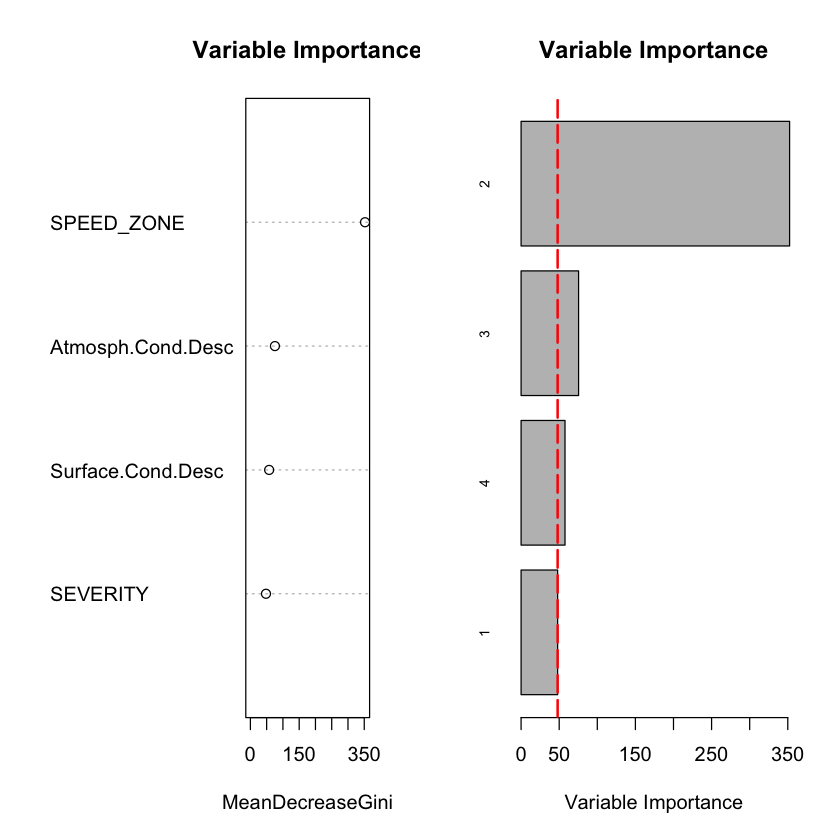

In [67]:
par(mfrow = c(1,2))
varImpPlot(combined_rf, main = 'Variable Importance')
rfImportance <- varImp(combined_rf)
barplot(sort(rfImportance$Overall), 
        horiz = TRUE, names.arg = paste(as.character(order(rfImportance$Overall))), cex.names = 0.7,
        xlab = 'Variable Importance')
abline(v = abs(min(rfImportance$Overal)), col='red', lty = 'longdash', lwd = 2)
title('Variable Importance')

#### Variable importance analysis
As shown above, of the 4 included variables, SPEED_ZONE is significantly more important than other variables. This indicates that speed is an important factor to road accidents. 